# Heatmaps code for all types of normalized data

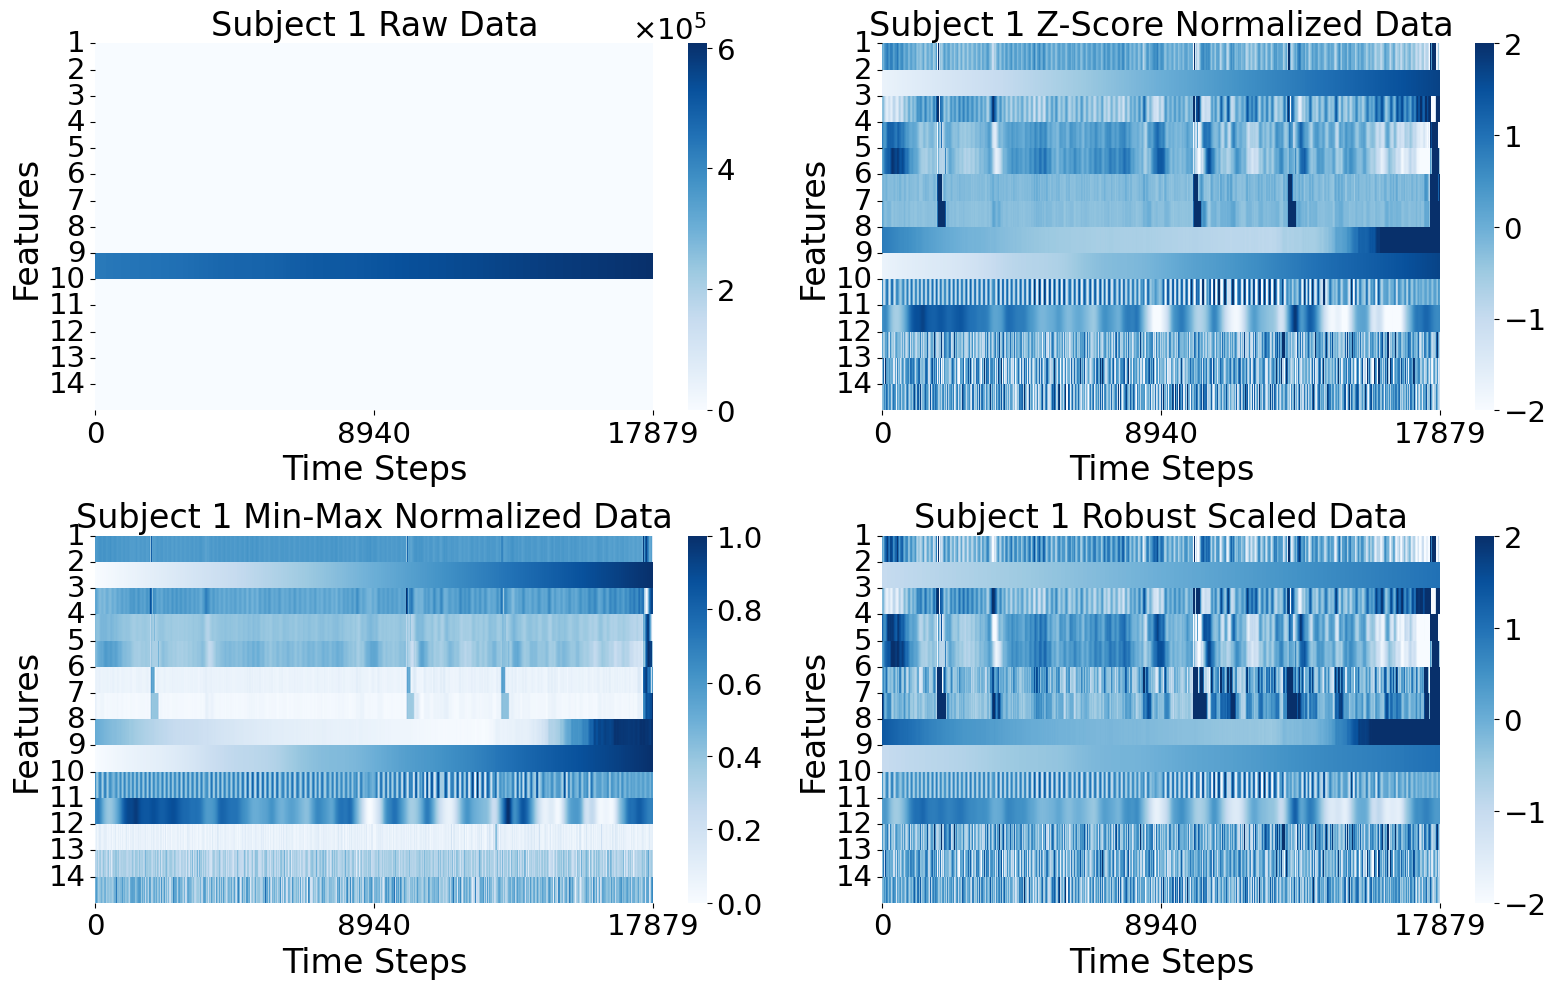

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# Paths to CSV files
raw_file_path = 'hopkins_export/sub-M10901084_cpt.csv'  # Raw data 
zscore_file_path = 'C:/Users/Liora/Downloads/zscore_subjects/zscore_sub-M10901084_cpt.csv'
minmax_file_path = 'C:/Users/Liora/Downloads/minmax_subjects/minmax_sub-M10901084_cpt.csv'
robust_file_path = 'C:/Users/Liora/Downloads/robust_subjects/Robust_Scaling_sub-M10901084_cpt.csv'

# Remove unnecessary columns
drop_ls = [
    "expected_time",
    "flip_time",
    "stim_pos",
    "user_pos",
    "lambda_val",
    "change_rate_x",
]

# Load the data
raw_data = pd.read_csv(raw_file_path).drop(columns=drop_ls)
zscore_data = pd.read_csv(zscore_file_path).drop(columns=drop_ls)
minmax_data = pd.read_csv(minmax_file_path).drop(columns=drop_ls)
robust_data = pd.read_csv(robust_file_path).drop(columns=drop_ls)

# Visualize heatmaps
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Common settings for all plots
num_features = raw_data.shape[1]  # Number of features after dropping columns
features = list(range(1, num_features + 1))  # Feature indices (1 to 21)

# Function to set x-axis ticks at 0, midpoint, and end
def adjust_x_ticks_limited(ax, data):
    num_time_steps = data.shape[0]  # Number of rows (time steps)
    mid_point = num_time_steps // 2
    ax.set_xticks([0, mid_point, num_time_steps - 1])
    ax.set_xticklabels([0, mid_point, num_time_steps - 1], rotation=0, fontsize=24)

# Raw data
raw_heatmap = sns.heatmap(raw_data.T, cmap='Blues', ax=axes[0, 0], annot=False, cbar=True)
axes[0, 0].set_title('Subject 1 Raw Data', fontsize=24)
axes[0, 0].set_xlabel('Time Steps', fontsize=24)
axes[0, 0].set_ylabel('Features', fontsize=24)
axes[0, 0].set_yticks(range(num_features))
axes[0, 0].set_yticklabels(features, fontsize=21)
adjust_x_ticks_limited(axes[0, 0], raw_data)

# Formatting the colorbar with scientific notation
cbar = raw_heatmap.collections[0].colorbar
cbar.formatter = ScalarFormatter(useMathText=True)
cbar.formatter.set_powerlimits((0, 0))  # Always use scientific notation
cbar.update_ticks()
cbar.ax.tick_params(labelsize=21)  # Set colorbar number font size to 21
cbar.ax.yaxis.offsetText.set_fontsize(21)  # Set font size of 'x 10^5'

# Z-Score Normalization
zscore_heatmap = sns.heatmap(zscore_data.T, cmap='Blues', ax=axes[0, 1], annot=False, vmin=-2, vmax=2, cbar=True)
axes[0, 1].set_title('Subject 1 Z-Score Normalized Data', fontsize=24)
axes[0, 1].set_xlabel('Time Steps', fontsize=24)
axes[0, 1].set_ylabel('Features', fontsize=24)
axes[0, 1].set_yticks(range(num_features))
axes[0, 1].set_yticklabels(features, fontsize=21)
adjust_x_ticks_limited(axes[0, 1], zscore_data)

# Updating colorbar font size for Z-score heatmap
zscore_cbar = zscore_heatmap.collections[0].colorbar
zscore_cbar.ax.tick_params(labelsize=21)

# Min-Max Normalization
minmax_heatmap = sns.heatmap(minmax_data.T, cmap='Blues', ax=axes[1, 0], annot=False, vmin=0, vmax=1, cbar=True)
axes[1, 0].set_title('Subject 1 Min-Max Normalized Data', fontsize=24)
axes[1, 0].set_xlabel('Time Steps', fontsize=24)
axes[1, 0].set_ylabel('Features', fontsize=24)
axes[1, 0].set_yticks(range(num_features))
axes[1, 0].set_yticklabels(features, fontsize=21)
adjust_x_ticks_limited(axes[1, 0], minmax_data)

# Updating colorbar font size for Min-Max heatmap
minmax_cbar = minmax_heatmap.collections[0].colorbar
minmax_cbar.ax.tick_params(labelsize=21)

# Robust Scaling Normalization
robust_heatmap = sns.heatmap(robust_data.T, cmap='Blues', ax=axes[1, 1], annot=False, vmin=-2, vmax=2, cbar=True)
axes[1, 1].set_title('Subject 1 Robust Scaled Data', fontsize=24)
axes[1, 1].set_xlabel('Time Steps', fontsize=24)
axes[1, 1].set_ylabel('Features', fontsize=24)
axes[1, 1].set_yticks(range(num_features))
axes[1, 1].set_yticklabels(features, fontsize=21)
adjust_x_ticks_limited(axes[1, 1], robust_data)

# Updating colorbar font size for Robust Scaling heatmap
robust_cbar = robust_heatmap.collections[0].colorbar
robust_cbar.ax.tick_params(labelsize=21)

# Adjusting tick label size for both axes
for ax in axes.flat:
    ax.tick_params(axis='both', which='major', labelsize=21)

# layout
plt.tight_layout()
plt.show()
